# Linear Regression 

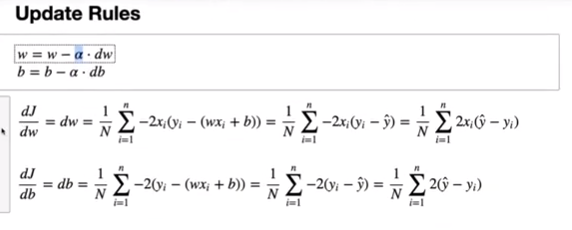

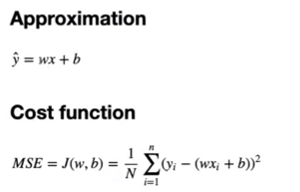

### Class Linear Regression with

1. init
2. fit
3. Predict

#### Initialization

- Learning rate and number of iterations as any value
- bias and weight as none

#### Fitting

- Take the number of samples and number of features
- Assign initial weight as an array of zeroes of the size of number of features
- Assign initial bias as 0

##### Gradient Descenting

- run for n_iter times
- calculate y predicted as the formula
- calculate the derivative of weight and bias, as per the formula
- update weight and bias

#### Predictions

- Calculate $\hat{y}$ as per the formula
- return the calculated value

In [1]:
class LinearRegression:

    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        '''
        Fit method takes the features `X` and `y` target
        build a linear model and calculate the weights and bias
        dynamically using `dw` and `db` and update the weights
        and bias using gradient descenting. 
        '''
        n_samples, n_features = X.shape

        # initalize the weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0


        # Start the learn algorithm gradient descenting
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute the weights and bias dynamically 
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update the weights and bias with actual
            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return np.array(y_predicted)

# Logistic Regression

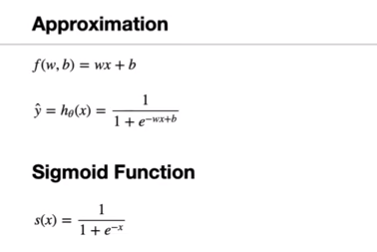

This is known as cross entropy: 
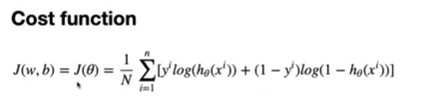

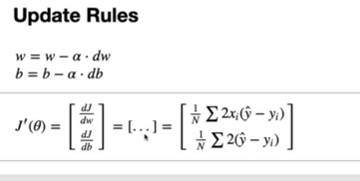

### Class Logistic Regression with

1. init
2. Fit
3. Predict

#### Init

- Learning rate and number of iterations as any value
- bias and weight as none

#### Fit

- Take the number of samples and features in the dataset
- Assign the initial weight of the weight array as 0, of the size of number of features
- Assign the initial bias as 0

##### Gradient Descenting

- Goes on for n_iter times
- Calculate the $\hat{y}$ as per the formula
- Calculate the derivatives of weight and bias, as per the formula
- Update weight and bias according to the formula

#### Predict

- Calculate the $\hat{y}$ as per the formula
- According to the threshold given, classify it to either class 1 or 0
- Return the classes

In [4]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Naive Bayes

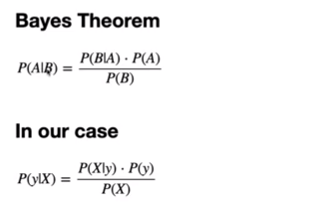

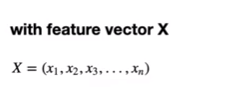

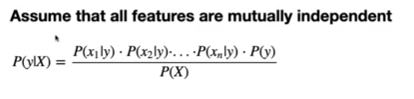

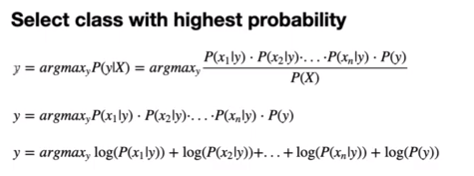